In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

uploaded = files.upload()

Saving forbes_top_2000_world_largest_public_companies.csv to forbes_top_2000_world_largest_public_companies.csv


In [ ]:
import pandas as pd
data = pd.read_csv('forbes_top_2000_world_largest_public_companies.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              2000 non-null   object 
 1   company           2000 non-null   object 
 2   contry/territory  2000 non-null   object 
 3   sales             2000 non-null   float64
 4   profits           2000 non-null   float64
 5   assets            2000 non-null   float64
 6   market_value      2000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [ ]:
# number of records and fields
data.shape # (records, fields)

(2000, 7)

In [ ]:
# head
data.head(n=5)

,rank,company,contry/territory,sales,profits,assets,market_value
0,#1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B
1,#2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B
2,#3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B
3,#4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B
4,#5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B


In [ ]:
# tail
data.tail(n=5)

,rank,company,contry/territory,sales,profits,assets,market_value
1995,#1995,Founder Securities,China,$1.4 B,$115 M,$18.6 B,$8.3 B
1996,#1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$631 M,$14.9 B,$4.3 B
1997,#1998,Heico,United States,$2.1 B,$371 M,$3.1 B,$11.8 B
1998,#1999,W.P. Carey,United States,$1.2 B,$305 M,$14.1 B,$11.3 B
1999,#1999,Zhejiang Century Huatong Group,China,$2.2 B,$365 M,$4.7 B,$12.1 B


In [ ]:
# data types
data.dtypes

rank                object
company             object
contry/territory    object
sales               object
profits             object
assets              object
market_value        object
dtype: object

**Verify Data**

---



In [ ]:
# Get summary statistics of the dataset
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

summary_stats, missing_values


(        rank company contry/territory   sales profits   assets market_value
 count   2000    2000             2000    2000    2000     2000         2000
 unique  1676    2000               64     610     903     1008          638
 top     #943    ICBC    United States  $2.6 B  $1.1 B  $17.3 B       $6.1 B
 freq       5       1              587      18      62       12           18,
 rank                0
 company             0
 contry/territory    0
 sales               0
 profits             0
 assets              0
 market_value        0
 dtype: int64)

In [ ]:
def convert_to_billion_updated(value):
    value = value.replace('$', '').replace(',', '').strip()

    if 'B' in value:
        return float(value.replace('B', ''))
    elif 'M' in value:
        return float(value.replace('M', '')) / 1000  # Convert million to billion
    else:
        return float(value)

for col in ['sales', 'profits', 'assets', 'market_value']:
    data[col] = data[col].apply(convert_to_billion_updated)

data.head()


,rank,company,contry/territory,sales,profits,assets,market_value
0,#1,ICBC,China,177.2,45.3,4322.5,242.3
1,#2,China Construction Bank,China,162.1,38.9,3822.0,203.8
2,#3,JPMorgan Chase,United States,142.9,30.0,3139.4,291.7
3,#4,Berkshire Hathaway,United States,254.6,81.4,817.7,455.4
4,#5,Agricultural Bank of China,China,148.7,30.9,3697.5,147.2


In [ ]:
# Descriptive statistics of the dataset
desc_stats = data.describe()

desc_stats


,sales,profits,assets,market_value
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,21.165246,1.661580,100.721219,27.150290
std,36.685406,4.484805,307.330245,78.266011
min,-1.200000,-17.900000,0.268000,0.009000
25%,4.775000,0.395000,12.900000,5.000000
50%,10.200000,0.729500,28.200000,11.650000
75%,21.000000,1.600000,67.050000,23.700000
max,524.000000,88.200000,4322.500000,1684.800000


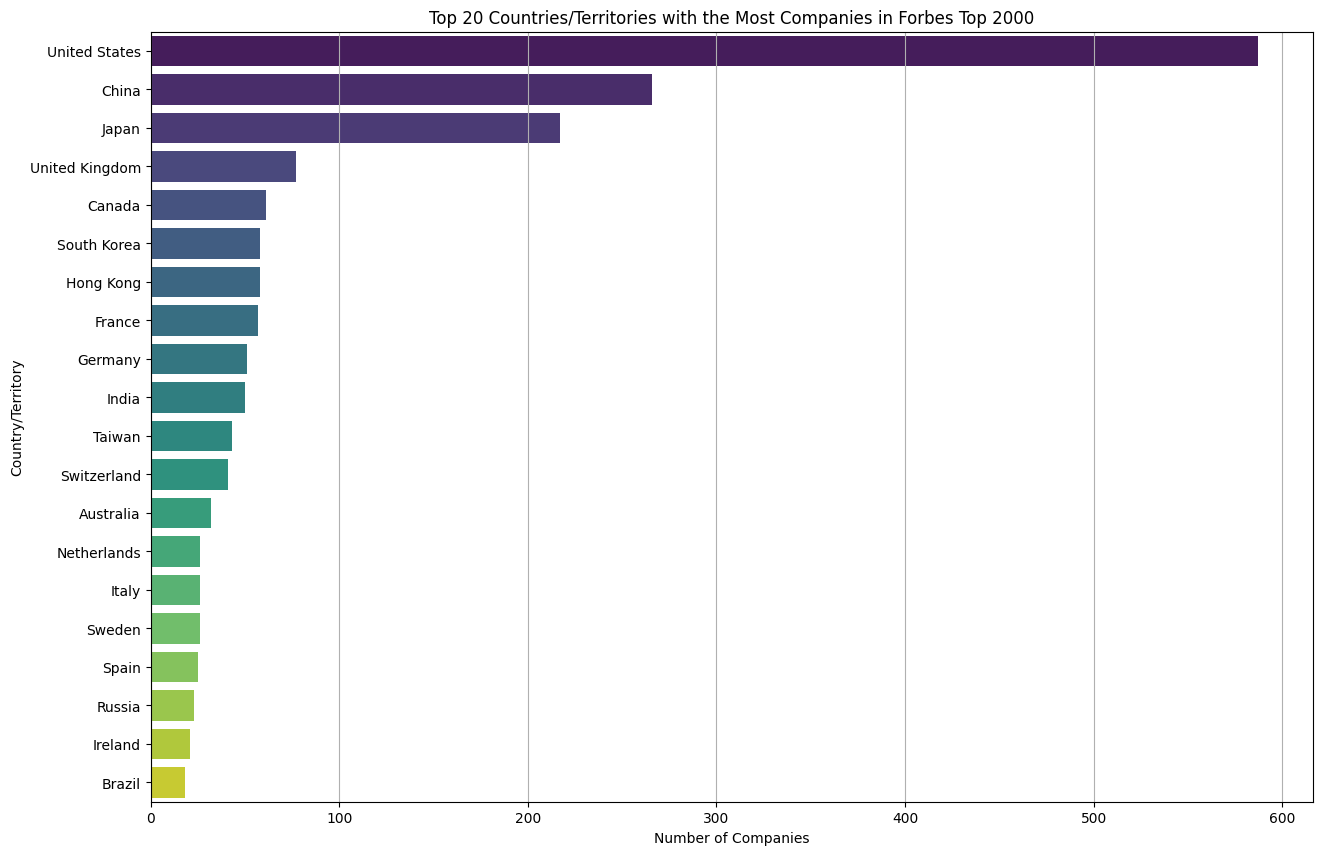

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 10))

# Count the number of companies by country and take the top 20 countries
country_counts = data['contry/territory'].value_counts().head(20)

# Plot the distribution of companies by country
sns.barplot(y=country_counts.index, x=country_counts.values, palette="viridis")
plt.xlabel('Number of Companies')
plt.ylabel('Country/Territory')
plt.title('Top 20 Countries/Territories with the Most Companies in Forbes Top 2000')
plt.grid(axis='x')

plt.show()


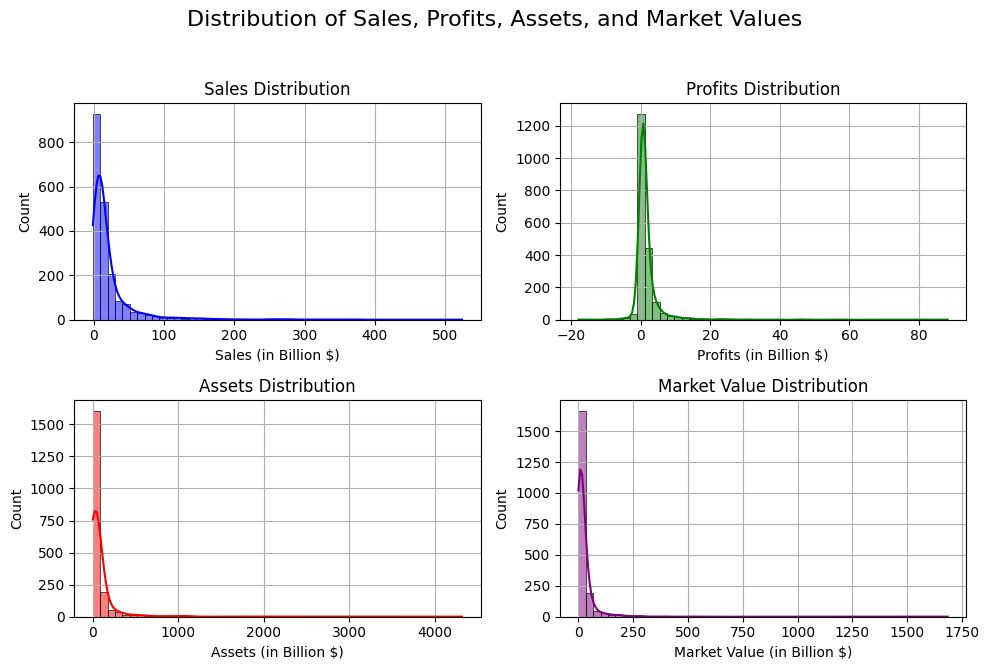

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Distribution of Sales, Profits, Assets, and Market Values', fontsize=16)

# Plot the distribution of Sales
sns.histplot(data['sales'], bins=50, kde=True, ax=ax[0, 0], color='blue')
ax[0, 0].set_title('Sales Distribution')
ax[0, 0].set_xlabel('Sales (in Billion $)')
ax[0, 0].grid(True)

# Plot the distribution of Profits
sns.histplot(data['profits'], bins=50, kde=True, ax=ax[0, 1], color='green')
ax[0, 1].set_title('Profits Distribution')
ax[0, 1].set_xlabel('Profits (in Billion $)')
ax[0, 1].grid(True)

# Plot the distribution of Assets
sns.histplot(data['assets'], bins=50, kde=True, ax=ax[1, 0], color='red')
ax[1, 0].set_title('Assets Distribution')
ax[1, 0].set_xlabel('Assets (in Billion $)')
ax[1, 0].grid(True)

# Plot the distribution of Market Values
sns.histplot(data['market_value'], bins=50, kde=True, ax=ax[1, 1], color='purple')
ax[1, 1].set_title('Market Value Distribution')
ax[1, 1].set_xlabel('Market Value (in Billion $)')
ax[1, 1].grid(True)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


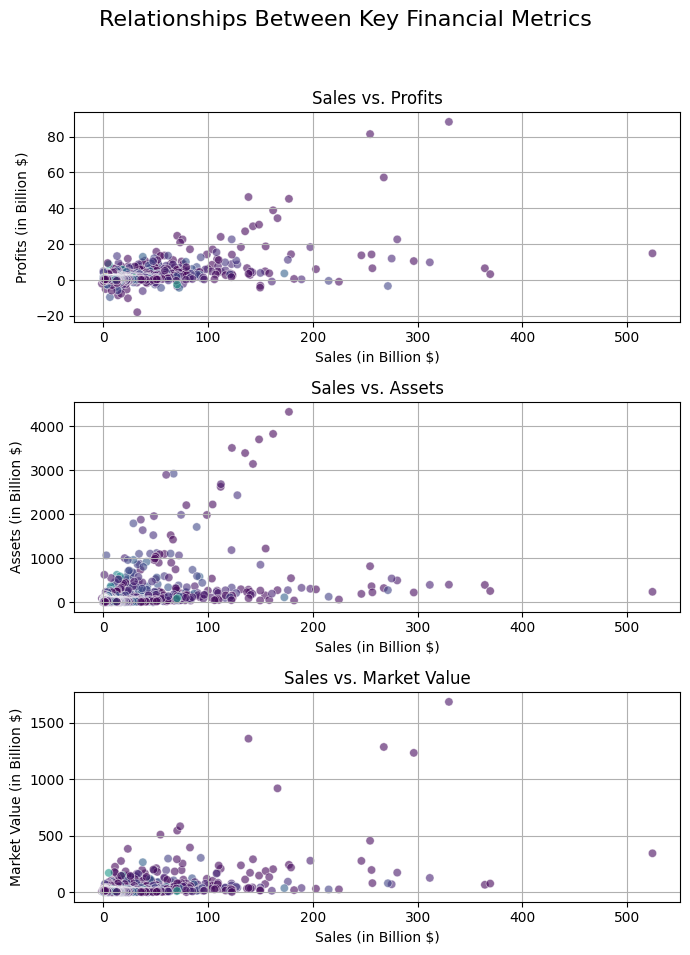

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(7, 10))
fig.suptitle('Relationships Between Key Financial Metrics', fontsize=16)

# Plot the relationship between Sales and Profits
sns.scatterplot(data=data, x='sales', y='profits', hue='contry/territory', ax=ax[0], palette='viridis', alpha=0.6)
ax[0].set_title('Sales vs. Profits')
ax[0].set_xlabel('Sales (in Billion $)')
ax[0].set_ylabel('Profits (in Billion $)')
ax[0].grid(True)
ax[0].get_legend().remove()

# Plot the relationship between Sales and Assets
sns.scatterplot(data=data, x='sales', y='assets', hue='contry/territory', ax=ax[1], palette='viridis', alpha=0.6)
ax[1].set_title('Sales vs. Assets')
ax[1].set_xlabel('Sales (in Billion $)')
ax[1].set_ylabel('Assets (in Billion $)')
ax[1].grid(True)
ax[1].get_legend().remove()

# Plot the relationship between Sales and Market Value
sns.scatterplot(data=data, x='sales', y='market_value', hue='contry/territory', ax=ax[2], palette='viridis', alpha=0.6)
ax[2].set_title('Sales vs. Market Value')
ax[2].set_xlabel('Sales (in Billion $)')
ax[2].set_ylabel('Market Value (in Billion $)')
ax[2].grid(True)
ax[2].get_legend().remove()

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


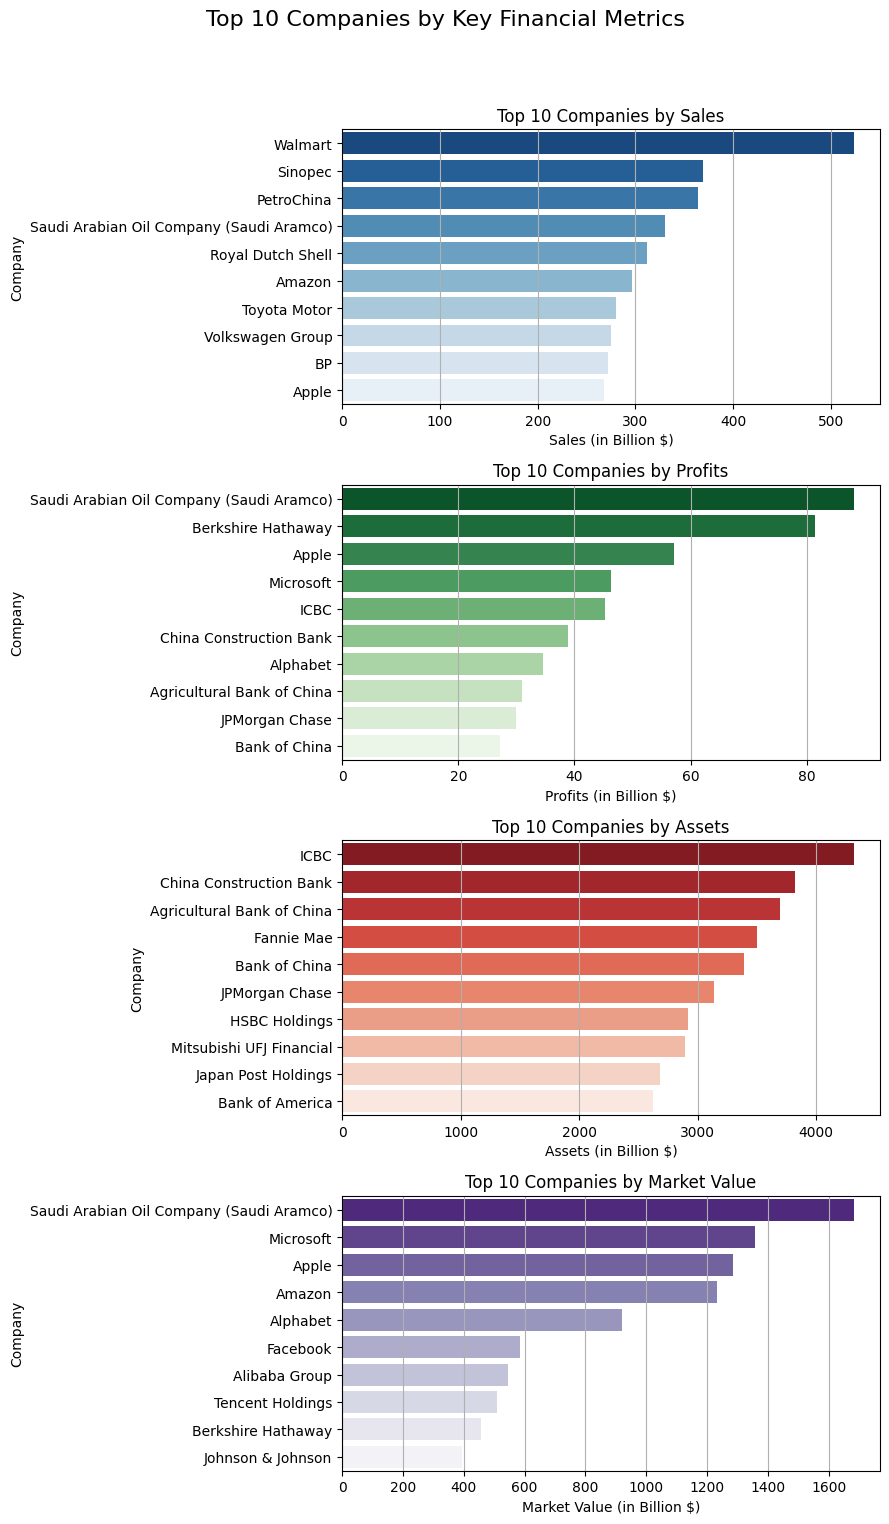

In [ ]:
# Number of top companies to display
top_n = 10

# Set up the figure and axes
fig, ax = plt.subplots(4, 1, figsize=(9, 16))
fig.suptitle('Top 10 Companies by Key Financial Metrics', fontsize=16)

# Top Companies by Sales
top_sales = data.nlargest(top_n, 'sales')
sns.barplot(data=top_sales, x='sales', y='company', ax=ax[0], palette='Blues_r')
ax[0].set_title('Top 10 Companies by Sales')
ax[0].set_xlabel('Sales (in Billion $)')
ax[0].set_ylabel('Company')
ax[0].grid(True, axis='x')

# Top Companies by Profits
top_profits = data.nlargest(top_n, 'profits')
sns.barplot(data=top_profits, x='profits', y='company', ax=ax[1], palette='Greens_r')
ax[1].set_title('Top 10 Companies by Profits')
ax[1].set_xlabel('Profits (in Billion $)')
ax[1].set_ylabel('Company')
ax[1].grid(True, axis='x')

# Top Companies by Assets
top_assets = data.nlargest(top_n, 'assets')
sns.barplot(data=top_assets, x='assets', y='company', ax=ax[2], palette='Reds_r')
ax[2].set_title('Top 10 Companies by Assets')
ax[2].set_xlabel('Assets (in Billion $)')
ax[2].set_ylabel('Company')
ax[2].grid(True, axis='x')

# Top Companies by Market Value
top_market_value = data.nlargest(top_n, 'market_value')
sns.barplot(data=top_market_value, x='market_value', y='company', ax=ax[3], palette='Purples_r')
ax[3].set_title('Top 10 Companies by Market Value')
ax[3].set_xlabel('Market Value (in Billion $)')
ax[3].set_ylabel('Company')
ax[3].grid(True, axis='x')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
